In [1]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 
from pyvis.network import Network
import random

In [2]:
from Tube import Tube, SleepyTube
from create_network import create_tube
from Policy import E_greedy_policy
from Q_Learning import Q_LEARNING 

In [3]:
random.seed(0)

In [4]:
G = create_tube()
G = G.lines()

stations = list(G.nodes)
stations = list(G.nodes)
name_to_index = {k: v for v, k in enumerate(stations)}
name_to_index['Westminster']
index_to_name = {v: k for k, v in name_to_index.items()} #https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping
G1 = nx.relabel_nodes(G,name_to_index)

In [5]:
tube = Tube(G1, 'Westminster')

In [6]:
tube.tube

array([[-1.,  0., -1., ..., -1., -1., -1.],
       [ 0., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1.,  0.],
       [-1., -1., -1., ..., -1.,  0., -1.]])

In [7]:
stube = SleepyTube(G1, "Blackfriars") #re-initialising the environment will randomly re-allocate delays and cancellations
stube.reset()

10

In [8]:
EPSILON = [0.1, 0.5, 0.9]
EPSILON_DECAY = 0.005
ALPHA = [0.1, 0.5, 0.9]
GAMMA = [0.1, 0.5, 0.9]

EARLY_STOPPING_THRESHOLD = 10 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [9]:
gs = []
labels = []
std = []
for l in range(len(GAMMA)):
    for i in range(len(EPSILON)):
        for j in range(len(ALPHA)):
            E_pol = E_greedy_policy(stube, EPSILON[i],EPSILON_DECAY) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON[i],EPSILON_DECAY,ALPHA[j],GAMMA[l], G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            all_stds = []
            params = [EPSILON[i], ALPHA[j], GAMMA[l]]
            for k in range(0, 1000): 
                
                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
                    all_stds.append(np.std(all_reward[-50:]))
            gs.append(all_reward)
            labels.append(params)
            std.append(all_stds)

k
The agent has fallen asleep and ended up at Westminster
Destination has been reached
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The agent has fallen asleep and ended up at Ealing Common
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The agent has fallen asleep and ended up at Ealing Common
The route to Acton Town is closed!
The route to Acton Town is closed!
The agent has fallen asleep and ended up at Ealing Common
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The route to Acton Town is closed!
The agent has fallen asleep and ended up at Ealing Common
The route to Act

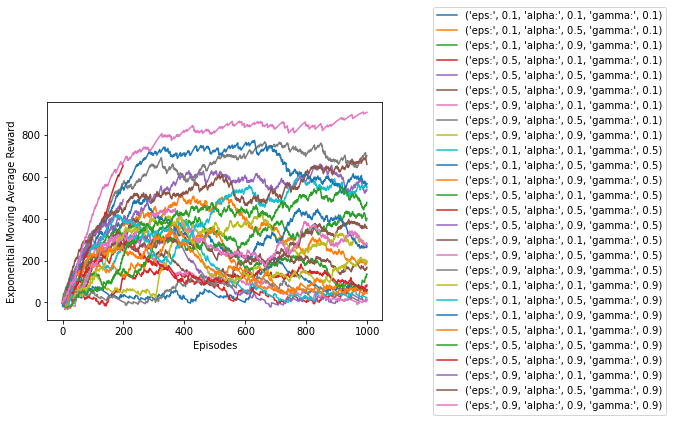

In [10]:
stube.plot_EMA(gs, labels, 0.99)

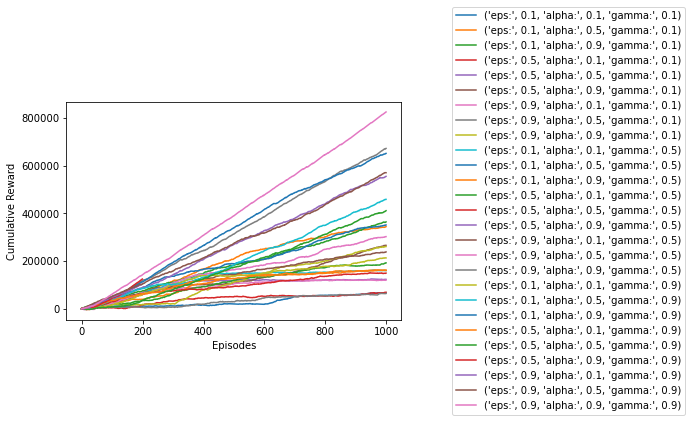

In [13]:
stube.plot_CUMREW(gs, labels)

In [39]:
stube.plot_EMA(gs[9:18], labels[9:18], 0.99)

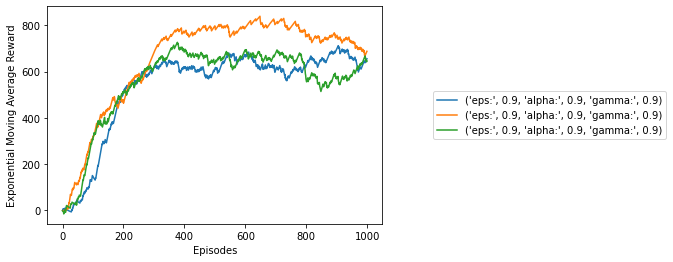

In [38]:
stube.plot_EMA(gs[-9:], labels[-9:], 0.99)

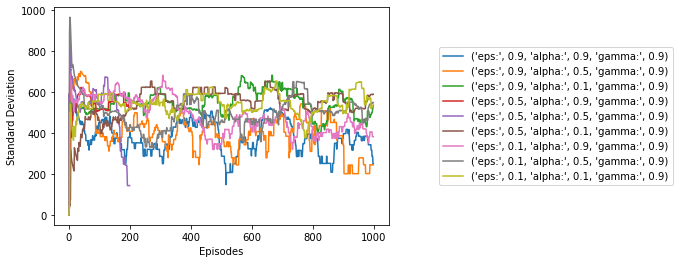

In [16]:
for i in range(9):

    plt.plot(std[-i], label = ("eps:",labels[-i-1][0],"alpha:",labels[-i-1][1],"gamma:", labels[-i-1][2]))
    plt.legend(bbox_to_anchor=(1.5, 0.5),loc = 'center') 
    plt.ylabel('Standard Deviation')
    plt.xlabel('Episodes')

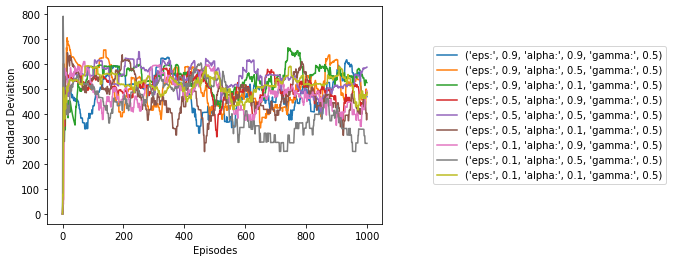

In [17]:
for i in range(9):

    plt.plot(std[-i-9], label = ("eps:",labels[-i-10][0],"alpha:",labels[-i-10][1],"gamma:", labels[-i-10][2]))
    plt.legend(bbox_to_anchor=(1.5, 0.5),loc = 'center') 
    plt.ylabel('Standard Deviation')
    plt.xlabel('Episodes')

In [18]:
EPSILON = [1]
EPSILON_DECAY = 0
ALPHA = [0.9]
GAMMA = [0.9]

EARLY_STOPPING_THRESHOLD = 150 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [19]:
gs_random = []
labels_random = []
for l in range(len(GAMMA)):
    for i in range(len(EPSILON)):
        for j in range(len(ALPHA)):
            E_pol = E_greedy_policy(stube, EPSILON[i],EPSILON_DECAY) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON[i],EPSILON_DECAY,ALPHA[j],GAMMA[l], G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            params = [EPSILON[i], ALPHA[j], GAMMA[l]]
            for k in range(0, 1000): 

                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
            gs_random.append(all_reward)
            labels_random.append(params)

ent has fallen asleep and ended up at Canon Street
The agent has fallen asleep and ended up at Aldgate East
The agent has fallen asleep and ended up at Monument
The agent has fallen asleep and ended up at Aldgate East
The agent has fallen asleep and ended up at Monument
The agent has fallen asleep and ended up at Canon Street
Destination has been reached
The agent has fallen asleep and ended up at London Bridge
The agent has fallen asleep and ended up at Waterloo
The agent has fallen asleep and ended up at Warren Street
The route to Euston is closed!
The route to Euston is closed!
The route to Euston is closed!
The route to Euston is closed!
The agent has fallen asleep and ended up at Oxford Circus
The agent has fallen asleep and ended up at Green Park
The agent has fallen asleep and ended up at Baker Street
The route to Edgware Road is closed!
The route to Edgware Road is closed!
The agent has fallen asleep and ended up at Marylebone
The agent has fallen asleep and ended up at Picadil

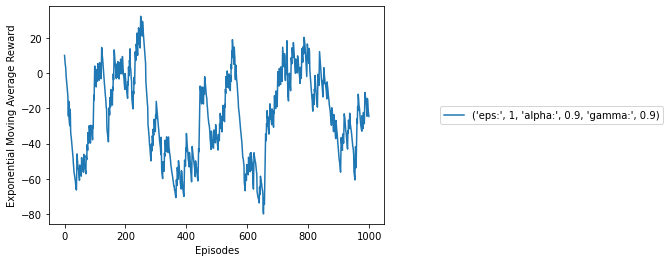

In [21]:
stube.plot_EMA(gs_random, labels_random, 0.99)

In [32]:
EPSILON = 0.9
EPSILON_DECAY = [0.005, 0.05, 0.5]
ALPHA = 0.9
GAMMA = 0.9

EARLY_STOPPING_THRESHOLD = 10 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [33]:
gs = []
labels = []
std = []

for i in range(len(EPSILON_DECAY)):
            E_pol = E_greedy_policy(stube, EPSILON,EPSILON_DECAY[i]) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON,EPSILON_DECAY[i],ALPHA,GAMMA, G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            all_stds = []
            params = [EPSILON, ALPHA, GAMMA, EPSILON_DECAY[i]]
            for k in range(0, 1000): 
                
                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
                    all_stds.append(np.std(all_reward[-50:]))
            gs.append(all_reward)
            labels.append(params)
            std.append(all_stds)

stminster
Destination has been reached
The agent has fallen asleep and ended up at Bank
The agent has fallen asleep and ended up at Liverpool Street
The agent has fallen asleep and ended up at Liverpool Street
The agent has fallen asleep and ended up at Liverpool Street
Environment Terminated
The agent has fallen asleep and ended up at Stamford Brook
The agent has fallen asleep and ended up at Earl's Court
The agent has fallen asleep and ended up at Embankment
Destination has been reached
The agent has fallen asleep and ended up at Warren Street
The agent has fallen asleep and ended up at Green Park
The agent has fallen asleep and ended up at Warren Street
The agent has fallen asleep and ended up at Victoria
Destination has been reached
The agent has fallen asleep and ended up at Kew Gardens
The agent has fallen asleep and ended up at Turnham Green
The agent has fallen asleep and ended up at Kew Gardens
The agent has fallen asleep and ended up at Turnham Green
The agent has fallen asle

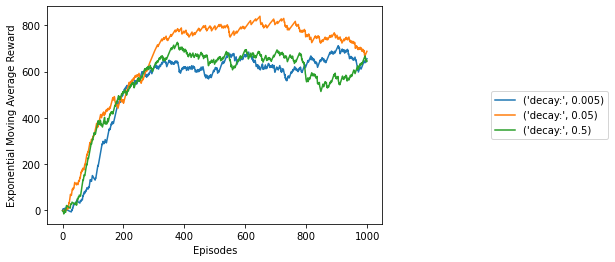

In [34]:
ema = 0.99
for i in range(len(gs)):
            x_hat = 0
            list_x_hat = [] 
            
            for index, value in enumerate(gs[i]):
                
                x_hat =  value* (1 - ema) + x_hat * ema

                list_x_hat.append(x_hat)
            
            plt.plot(list_x_hat, '-', label = ("decay:",labels[i][3]))
            plt.legend(bbox_to_anchor=(1.5, 0.5),loc = 'center')     
            plt.xlabel('Episodes')
            plt.ylabel('Exponential Moving Average Reward')     

In [35]:
EPSILON = [0.9]
EPSILON_DECAY = 0.05
ALPHA = [0.25, 0.5, 0.75,0.9]
GAMMA = [0.9]

EARLY_STOPPING_THRESHOLD = 150 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [40]:
gs = []
labels = []
std = []
for l in range(len(GAMMA)):
    for i in range(len(EPSILON)):
        for j in range(len(ALPHA)):
            E_pol = E_greedy_policy(stube, EPSILON[i],EPSILON_DECAY) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON[i],EPSILON_DECAY,ALPHA[j],GAMMA[l], G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            all_stds = []
            params = [EPSILON[i], ALPHA[j], GAMMA[l]]
            for k in range(0, 1000): 
                
                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
                    all_stds.append(np.std(all_reward[-50:]))
            gs.append(all_reward)
            labels.append(params)
            std.append(all_stds)

ed
The agent has fallen asleep and ended up at Finsbury Park
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at Covent Garden
The agent has fallen asleep and ended up at Russell Square
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at Covent Garden
The agent has fallen asleep and ended up at Covent Garden
The agent has fallen asleep and ended up at Russell Square
The agent has fallen asleep and ended up at Covent Garden
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at Covent Garden
Environment Terminated
The agent has fallen asleep and ended up at Vauxhall
The agent has fallen asleep and ended up at Green Park
The agent has fallen asleep and ended up at Westminster
Dest

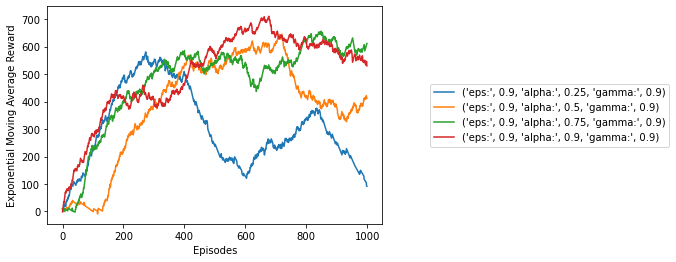

In [41]:
stube.plot_EMA(gs, labels, 0.99)

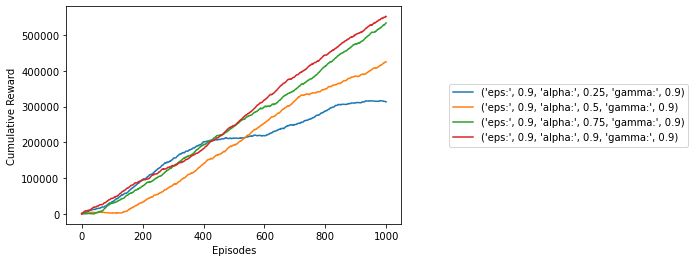

In [42]:
stube.plot_CUMREW(gs,labels)

In [46]:
EPSILON = [0.9]
EPSILON_DECAY = 0.05
ALPHA = [0.9]
GAMMA = [0.25, 0.5, 0.75,0.9]

EARLY_STOPPING_THRESHOLD = 10 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [47]:
gs = []
labels = []
std = []
for l in range(len(GAMMA)):
    for i in range(len(EPSILON)):
        for j in range(len(ALPHA)):
            E_pol = E_greedy_policy(stube, EPSILON[i],EPSILON_DECAY) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON[i],EPSILON_DECAY,ALPHA[j],GAMMA[l], G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            all_stds = []
            params = [EPSILON[i], ALPHA[j], GAMMA[l]]
            for k in range(0, 1000): 
                
                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
                    all_stds.append(np.std(all_reward[-50:]))
            gs.append(all_reward)
            labels.append(params)
            std.append(all_stds)

ent has fallen asleep and ended up at Vauxhall
Destination has been reached
The agent has fallen asleep and ended up at Stamford Brook
Destination has been reached
The agent has fallen asleep and ended up at Putney Bridge
The agent has fallen asleep and ended up at West Brompton
The agent has fallen asleep and ended up at St James's Park
Destination has been reached
Destination has been reached
The agent has fallen asleep and ended up at Edgware Road
Environment Terminated
The agent has fallen asleep and ended up at Chancery Lane
The agent has fallen asleep and ended up at Moorgate
The agent has fallen asleep and ended up at Moorgate
The agent has fallen asleep and ended up at Moorgate
The agent has fallen asleep and ended up at Moorgate
The agent has fallen asleep and ended up at Chancery Lane
The agent has fallen asleep and ended up at Moorgate
Environment Terminated
Destination has been reached
The agent has fallen asleep and ended up at Euston
The agent has fallen asleep and ended 

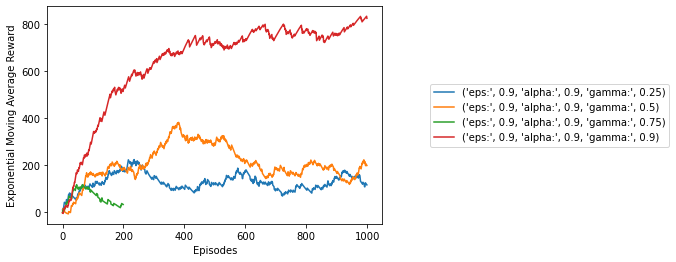

In [48]:
stube.plot_EMA(gs, labels, 0.99)

In [52]:
EPSILON = [0.25, 0.5, 0.75,0.9]
EPSILON_DECAY = 0.05
ALPHA = [0.9]
GAMMA = [0.9]

EARLY_STOPPING_THRESHOLD = 10 #chosen after observation of std of runs
MAX_REWARD_LENGTH = 200 #chosen after observing multiple runs

In [53]:
gs = []
labels = []
std = []
for l in range(len(GAMMA)):
    for i in range(len(EPSILON)):
        for j in range(len(ALPHA)):
            E_pol = E_greedy_policy(stube, EPSILON[i],EPSILON_DECAY) #envir, epsilon, decay... This will reset Epsillon
            q_learning = Q_LEARNING(stube,EPSILON[i],EPSILON_DECAY,ALPHA[j],GAMMA[l], G1) #envir, epsilon, decay, alpha, gamma, G1... This will reset Q_matrix
            all_reward = [] 
            all_stds = []
            params = [EPSILON[i], ALPHA[j], GAMMA[l]]
            for k in range(0, 1000): 
                
                if len(all_reward) == MAX_REWARD_LENGTH and np.std(all_reward[-5:]) <= EARLY_STOPPING_THRESHOLD:
                        break
                else:
                    total_reward = Q_LEARNING.Q_learning_episode(q_learning, E_pol, stube)
                    all_reward.append(total_reward)
                    all_stds.append(np.std(all_reward[-50:]))
            gs.append(all_reward)
            labels.append(params)
            std.append(all_stds)

nation has been reached
The agent has fallen asleep and ended up at Blackhorse Road
The agent has fallen asleep and ended up at Finsbury Park
The agent has fallen asleep and ended up at King's Cross St Pancras
The agent has fallen asleep and ended up at Euston
The agent has fallen asleep and ended up at Victoria
The agent has fallen asleep and ended up at Westminster
Destination has been reached
Destination has been reached
The agent has fallen asleep and ended up at Westminster
Destination has been reached
The agent has fallen asleep and ended up at Hammersmith
The agent has fallen asleep and ended up at West Brompton
The agent has fallen asleep and ended up at South Kensington
The agent has fallen asleep and ended up at West Brompton
The agent has fallen asleep and ended up at Sloane Square
Destination has been reached
The agent has fallen asleep and ended up at Sloane Square
The agent has fallen asleep and ended up at Embankment
Destination has been reached
Destination has been reac

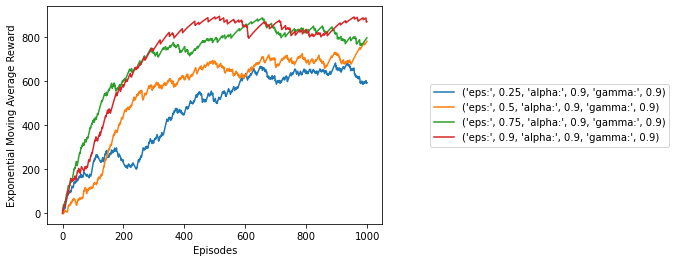

In [54]:
stube.plot_EMA(gs, labels, 0.99)